# Step 03
# Predict segmentations

In [1]:
%matplotlib inline

In [2]:
import os
import os.path

import matplotlib.pyplot as plt
import numpy as np

import skimage.io
import skimage.morphology

import tensorflow as tf
import keras

import utils.metrics
import utils.model_builder

Using TensorFlow backend.


# Configuration

In [3]:
from config import config_vars

# Partition of the data to make predictions (test or validation)
partition = "validation"

experiment_name = '01'

config_vars = utils.dirtools.setup_experiment(config_vars, experiment_name)

data_partitions = utils.dirtools.read_data_partitions(config_vars)

config_vars

{'root_directory': 'data1/image-segmentation/BBBC022/unet/',
 'max_training_images': 0,
 'create_split_files': False,
 'training_fraction': 0.5,
 'validation_fraction': 0.25,
 'transform_images_to_PNG': True,
 'pixel_depth': 8,
 'min_nucleus_size': 25,
 'boundary_size': 2,
 'augment_images': False,
 'elastic_points': 16,
 'elastic_distortion': 5,
 'elastic_augmentations': 10,
 'learning_rate': 0.0001,
 'epochs': 15,
 'steps_per_epoch': 500,
 'batch_size': 10,
 'val_batch_size': 10,
 'rescale_labels': True,
 'crop_size': 256,
 'cell_min_size': 16,
 'boundary_boost_factor': 1,
 'object_dilation': 3,
 'raw_images_dir': 'data1/image-segmentation/BBBC022/unet/raw_images/',
 'raw_annotations_dir': 'data1/image-segmentation/BBBC022/unet/raw_annotations/',
 'path_files_training': 'data1/image-segmentation/BBBC022/unet/training.txt',
 'path_files_validation': 'data1/image-segmentation/BBBC022/unet/validation.txt',
 'path_files_test': 'data1/image-segmentation/BBBC022/unet/test.txt',
 'normalize

In [4]:
# Device configuration

# Use the following configuration if you want to test on CPUs
# os.environ['CUDA_VISIBLE_DEVICES'] = ''
# configuration = tf.ConfigProto(
#       intra_op_parallelism_threads=1,
#       inter_op_parallelism_threads=1)

# Configuration to run on GPU
configuration = tf.ConfigProto()
configuration.gpu_options.allow_growth = True
configuration.gpu_options.visible_device_list = "0"

session = tf.Session(config = configuration)

# apply session
keras.backend.set_session(session)

# Load images and run predictions

In [5]:
#image_names = [f for f in data_partitions[partition] if f.startswith("IXM")]
image_names = [os.path.join(config_vars["normalized_images_dir"], f) for f in data_partitions[partition]]

imagebuffer = skimage.io.imread_collection(image_names)

images = imagebuffer.concatenate()

dim1 = images.shape[1]
dim2 = images.shape[2]

images = images.reshape((-1, dim1, dim2, 1))

# preprocess (assuming images are encoded as 8-bits in the preprocessing step)
images = images / 255

# build model and load weights
model = utils.model_builder.get_model_3_class(dim1, dim2)
model.load_weights(config_vars["model_file"])

# Normal prediction time
predictions = model.predict(images, batch_size=1)

model.summary()

/home/lanbowen23/Instance/unet4nuclei/unet4nuclei/utils/model_builder.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(x)
/home/lanbowen23/Instance/unet4nuclei/unet4nuclei/utils/model_builder.py:17: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/lanbowen23/Instance/unet4nuclei/unet4nuclei/utils/model_builder.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(a)
/home/lanbowen23/Instance/unet4nuclei/unet4nuclei/utils/model_builder.py:20: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 520, 696, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 520, 696, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 520, 696, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 520, 696, 64) 36928       batch_normalization_1[0][0]      
__________________________________________________________________________________________________
batch_norm

# Transform predictions to label matrices

IXMtest_A02_s1_w1051DAA7C-7042-435F-99F0-1E847D9B42CB.png


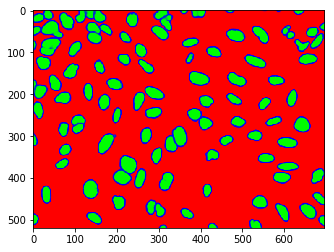

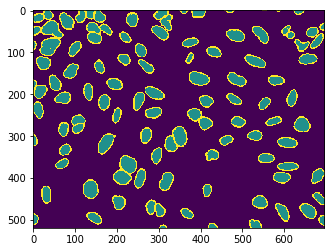

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/morphology/misc.py:212: UserWarning: the min_size argument is deprecated and will be removed in 0.16. Use area_threshold instead.
  "0.16. Use area_threshold instead.")


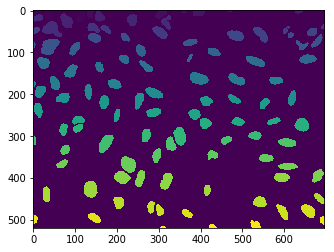

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_A02_s1_w1051DAA7C-7042-435F-99F0-1E847D9B42CB.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_B04_s4_w1F6AEFA0F-AF87-4B3B-A334-698647CFE043.png


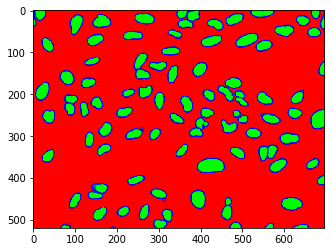

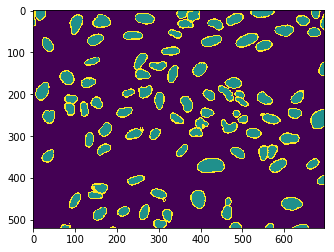

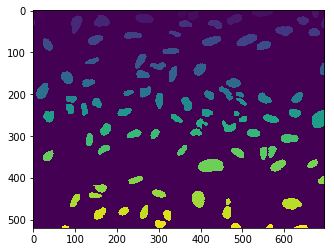

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_B04_s4_w1F6AEFA0F-AF87-4B3B-A334-698647CFE043.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_B12_s2_w19F7E0279-D087-4B5E-9899-61971C29CB78.png


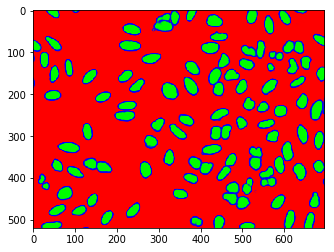

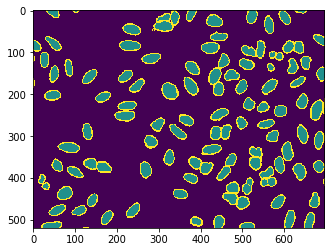

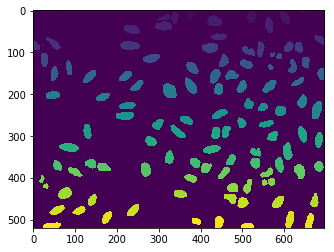

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_B12_s2_w19F7E0279-D087-4B5E-9899-61971C29CB78.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_B17_s7_w1215A0A98-4A76-4846-B54A-F7C1EAF84E02.png


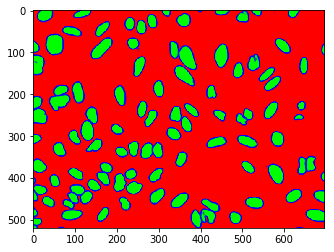

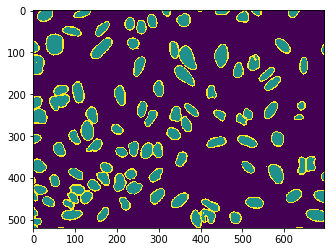

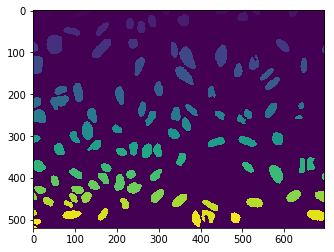

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_B17_s7_w1215A0A98-4A76-4846-B54A-F7C1EAF84E02.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_B19_s7_w1E43B84DB-39E2-4BFB-8CB4-554B32098C75.png


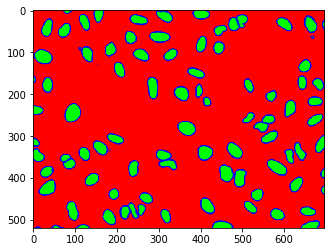

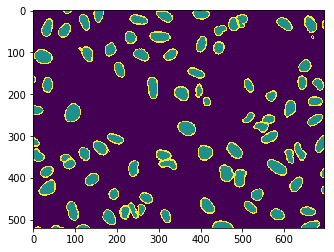

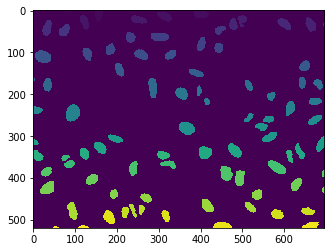

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_B19_s7_w1E43B84DB-39E2-4BFB-8CB4-554B32098C75.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_B24_s9_w18C4FE0DD-12CA-4711-9722-3E3105D1E691.png


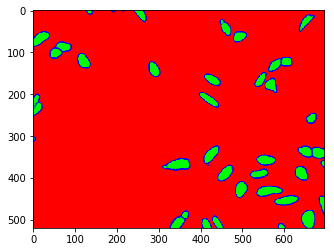

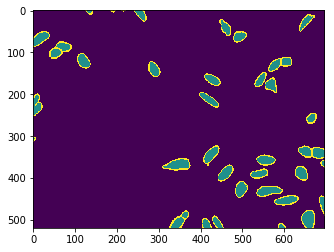

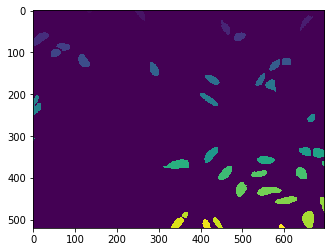

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_B24_s9_w18C4FE0DD-12CA-4711-9722-3E3105D1E691.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_C18_s1_w11C16FC59-2E29-496A-803A-89581FDF538A.png


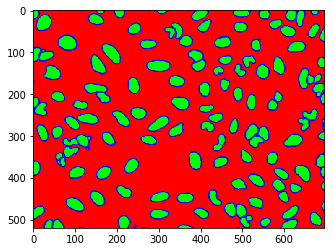

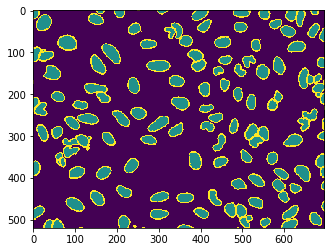

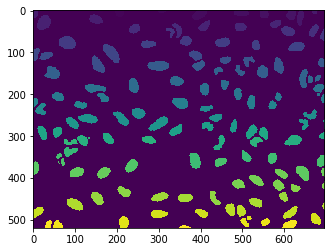

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_C18_s1_w11C16FC59-2E29-496A-803A-89581FDF538A.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_D02_s8_w1AC6783DF-ED35-4818-8091-E6D02AF4BFBD.png


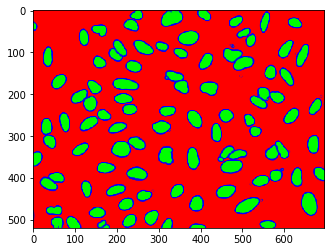

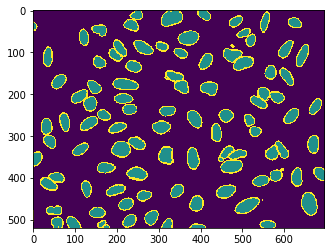

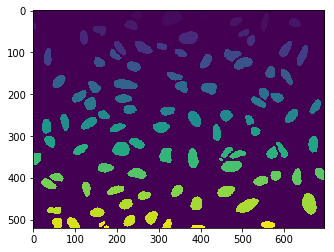

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_D02_s8_w1AC6783DF-ED35-4818-8091-E6D02AF4BFBD.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_D07_s4_w16CF58D03-0B05-41FE-AE73-7298887DEBB1.png


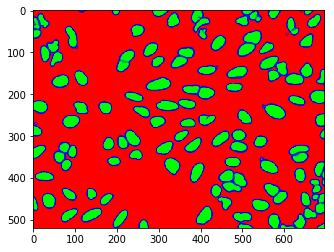

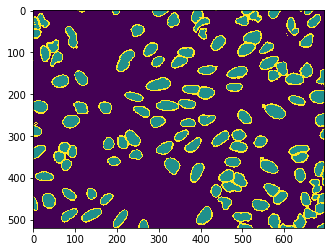

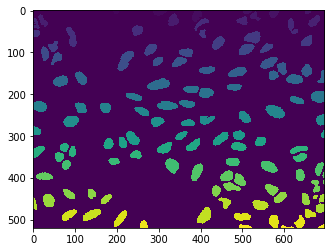

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_D07_s4_w16CF58D03-0B05-41FE-AE73-7298887DEBB1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_D19_s6_w1EB1F11AE-4FB6-481F-94D9-40246870F0CB.png


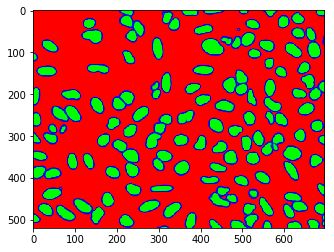

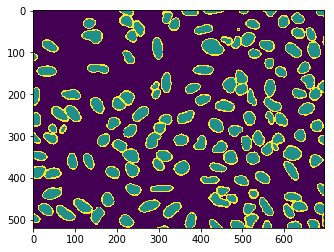

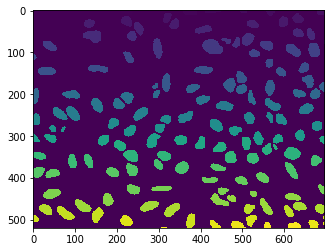

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_D19_s6_w1EB1F11AE-4FB6-481F-94D9-40246870F0CB.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_E06_s3_w1701573EB-CE9A-4D76-8668-0416996E1DCD.png


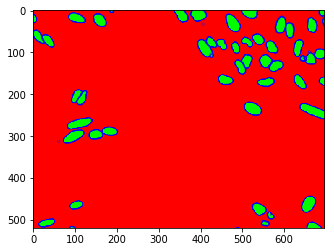

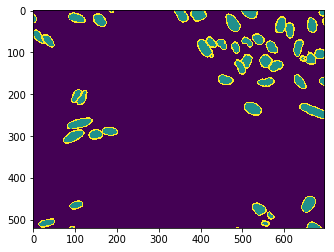

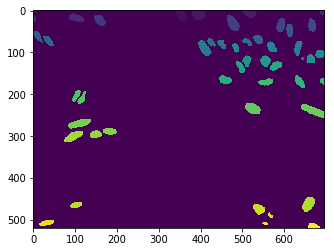

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_E06_s3_w1701573EB-CE9A-4D76-8668-0416996E1DCD.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_E12_s9_w1A811DEC0-ADD9-411A-B5D5-A654C70F253D.png


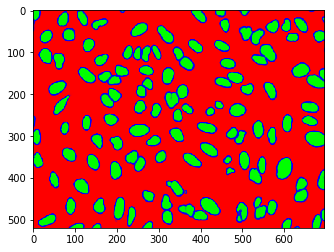

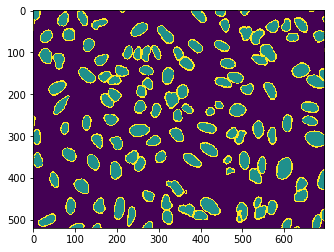

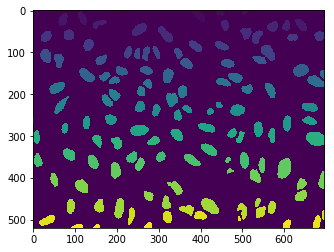

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_E12_s9_w1A811DEC0-ADD9-411A-B5D5-A654C70F253D.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_F08_s1_w144C3056F-C4DD-4D39-A40F-4F4576A6DBD8.png


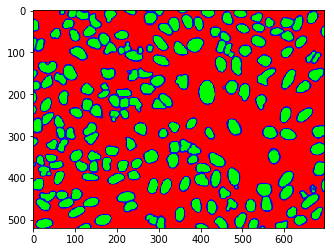

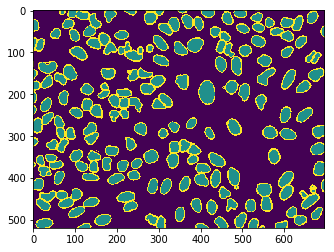

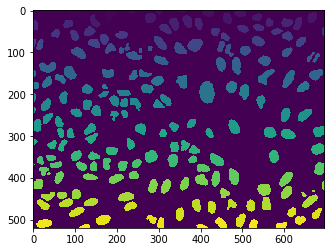

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_F08_s1_w144C3056F-C4DD-4D39-A40F-4F4576A6DBD8.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_F12_s5_w17F3E9DFC-6705-40A9-B5FE-C60261D73052.png


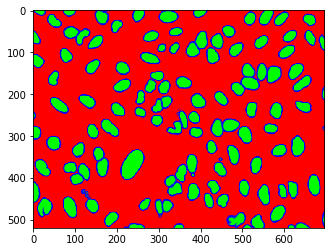

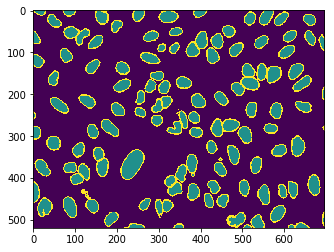

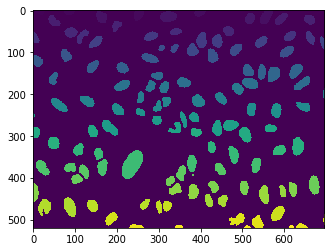

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_F12_s5_w17F3E9DFC-6705-40A9-B5FE-C60261D73052.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_F22_s6_w1F4C7ADE4-B68D-4D30-A063-722B87AA2DA1.png


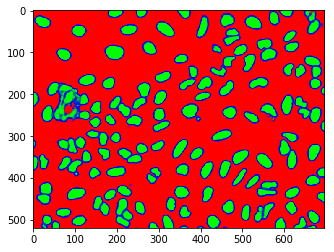

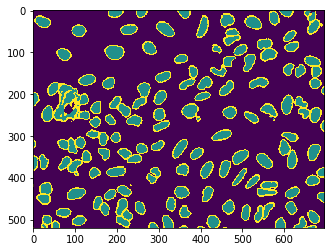

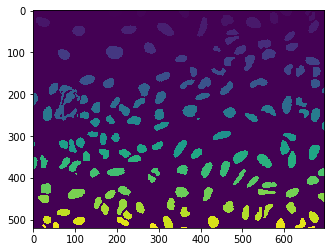

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_F22_s6_w1F4C7ADE4-B68D-4D30-A063-722B87AA2DA1.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_G10_s3_w1C1257E17-1DBA-4619-B06E-D6DBB8A53088.png


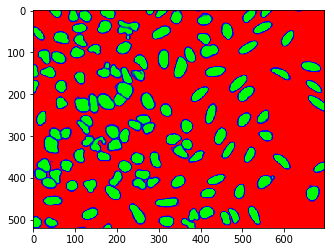

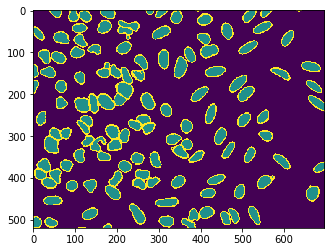

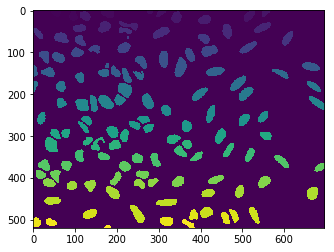

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_G10_s3_w1C1257E17-1DBA-4619-B06E-D6DBB8A53088.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_G12_s6_w16850371E-A405-4D73-9816-F5F68F885D38.png


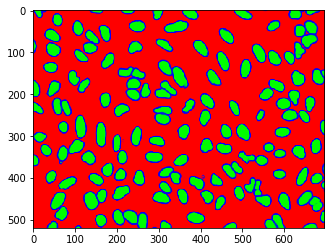

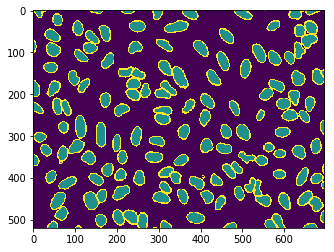

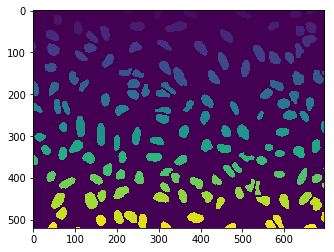

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_G12_s6_w16850371E-A405-4D73-9816-F5F68F885D38.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_G13_s9_w19606195E-12B4-46FF-9B83-1F7FE11B3AFB.png


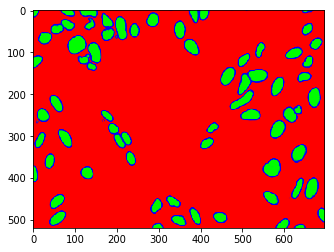

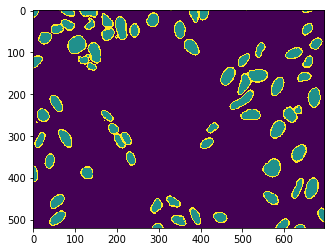

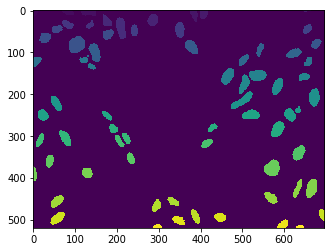

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_G13_s9_w19606195E-12B4-46FF-9B83-1F7FE11B3AFB.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_G18_s9_w17F495AF2-03D2-4683-BD37-56887F4A3A84.png


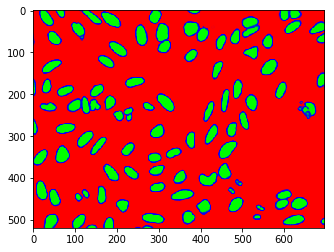

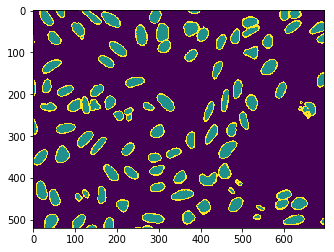

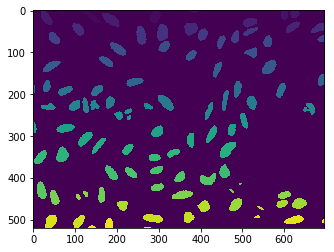

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_G18_s9_w17F495AF2-03D2-4683-BD37-56887F4A3A84.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_G22_s3_w157F2847B-C953-410E-8F60-956A6023AED4.png


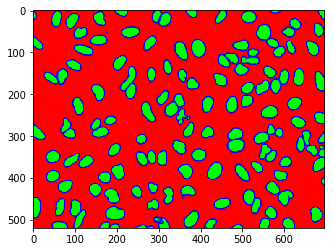

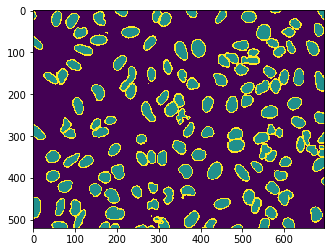

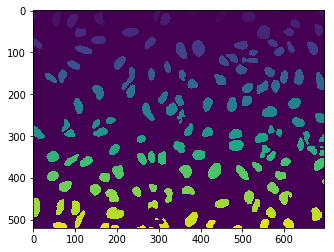

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_G22_s3_w157F2847B-C953-410E-8F60-956A6023AED4.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_G22_s5_w1CE8AEFCD-7739-4D60-B112-9D2D73EE05E5.png


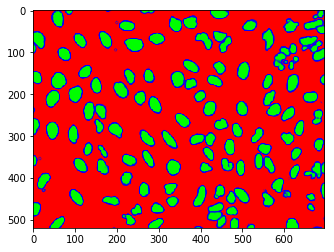

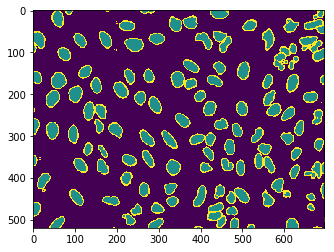

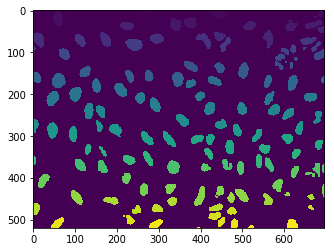

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_G22_s5_w1CE8AEFCD-7739-4D60-B112-9D2D73EE05E5.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_H11_s6_w19DF4E879-8DE4-45D6-840B-305BDDB27076.png


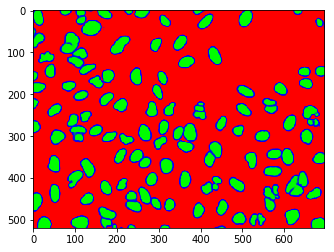

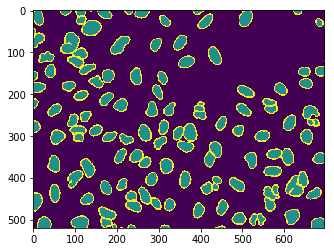

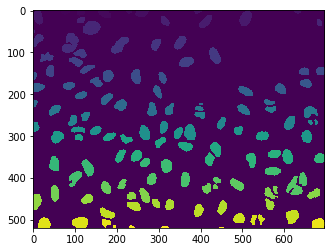

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_H11_s6_w19DF4E879-8DE4-45D6-840B-305BDDB27076.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_I01_s4_w1218CC565-C87E-4390-936A-4D3E51BC10DB.png


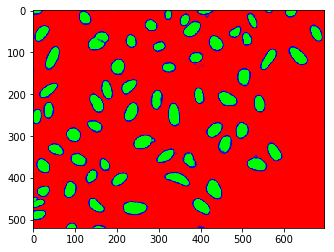

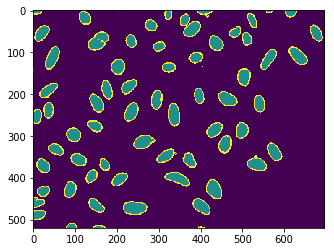

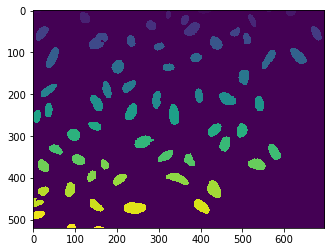

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_I01_s4_w1218CC565-C87E-4390-936A-4D3E51BC10DB.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_I04_s9_w16A5CC270-8B92-42EE-AA4A-855776F7D46B.png


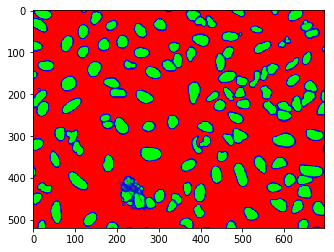

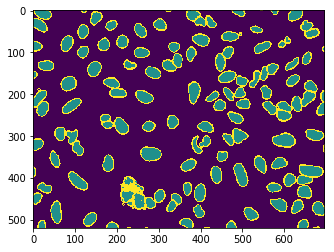

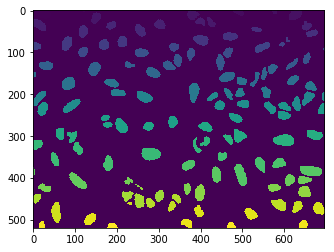

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_I04_s9_w16A5CC270-8B92-42EE-AA4A-855776F7D46B.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_I07_s4_w1F156255A-3842-46FB-ABF2-9D041E523F86.png


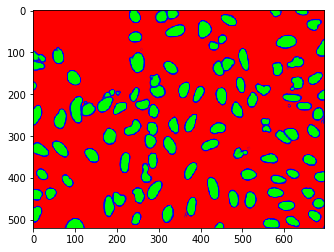

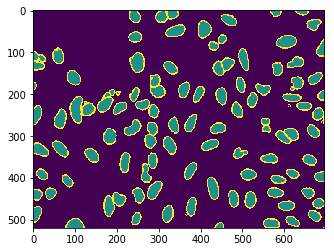

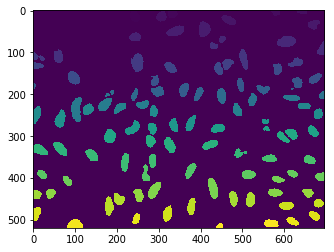

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_I07_s4_w1F156255A-3842-46FB-ABF2-9D041E523F86.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_I08_s2_w11996D679-5D76-4FB8-A681-2014A8999EC8.png


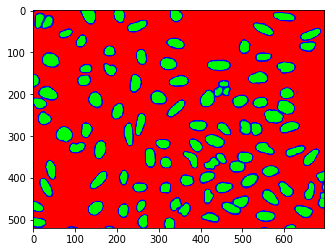

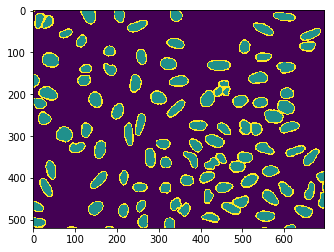

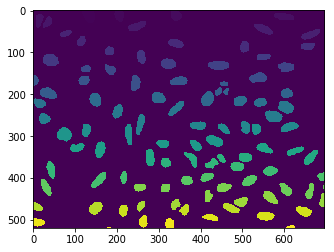

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_I08_s2_w11996D679-5D76-4FB8-A681-2014A8999EC8.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_I11_s6_w1B2DC04C7-2D7D-45C6-9DC2-66D8605FBE63.png


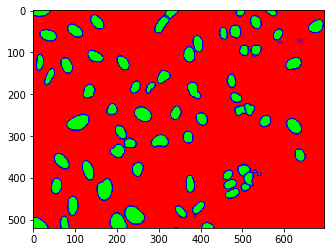

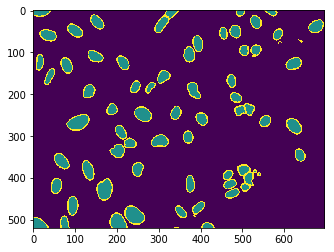

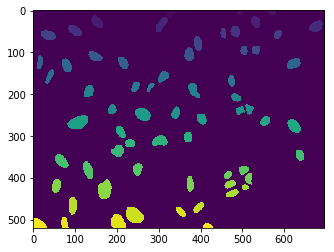

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_I11_s6_w1B2DC04C7-2D7D-45C6-9DC2-66D8605FBE63.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_I16_s9_w1582FD22A-5270-4FDC-868F-5F75808E2321.png


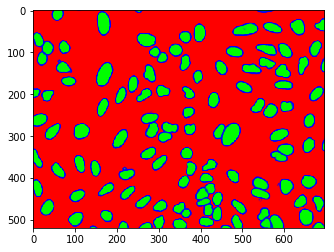

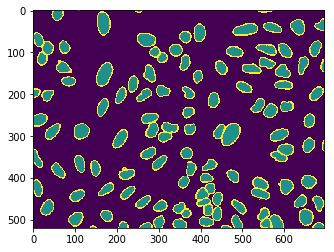

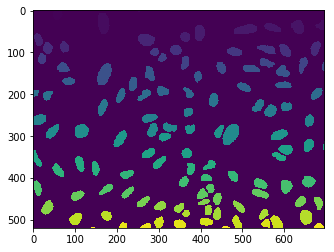

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_I16_s9_w1582FD22A-5270-4FDC-868F-5F75808E2321.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_I18_s3_w1544C8B7A-E092-4F9D-B8D3-C489638D770F.png


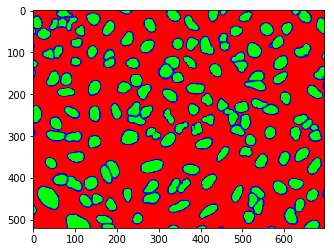

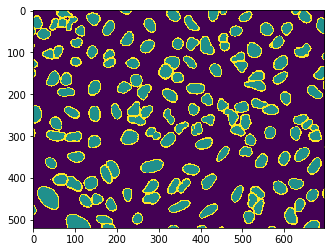

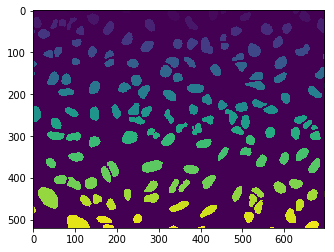

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_I18_s3_w1544C8B7A-E092-4F9D-B8D3-C489638D770F.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_J02_s8_w1D9C198F9-ECF0-4EF7-848D-AC7782CD3C28.png


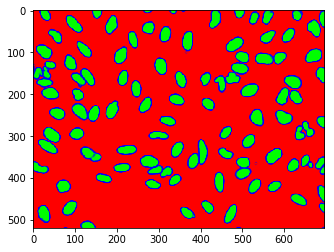

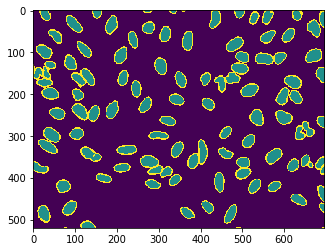

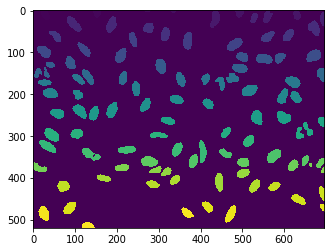

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_J02_s8_w1D9C198F9-ECF0-4EF7-848D-AC7782CD3C28.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_J08_s2_w1C146DB1C-05B3-49EF-9C62-1185FD9897AC.png


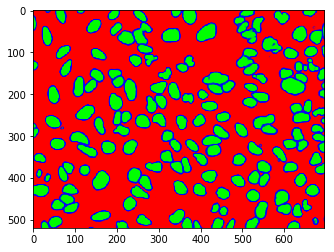

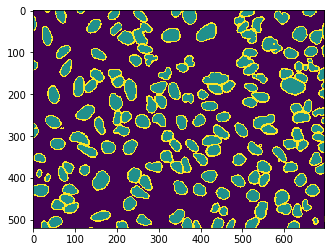

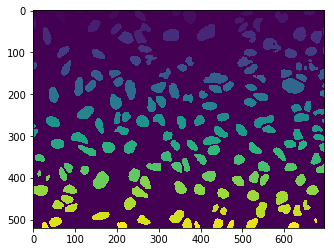

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_J08_s2_w1C146DB1C-05B3-49EF-9C62-1185FD9897AC.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_J20_s1_w1EEE65E52-7AD8-47C7-A286-6E84C5D77953.png


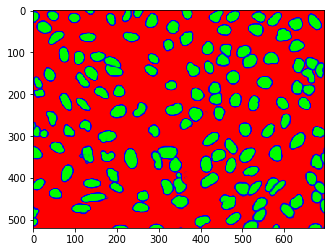

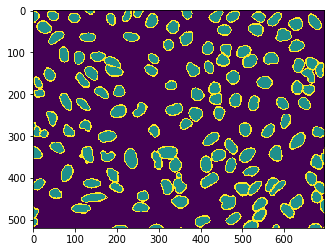

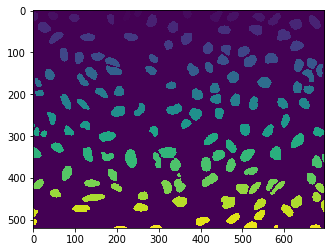

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_J20_s1_w1EEE65E52-7AD8-47C7-A286-6E84C5D77953.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_K12_s1_w193D6C057-1AA9-4E2F-86EA-2E71961BE68B.png


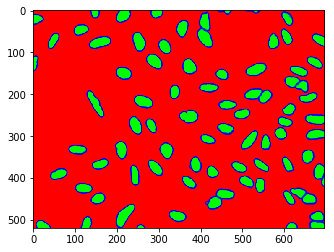

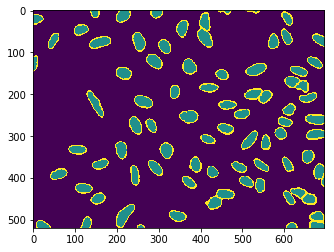

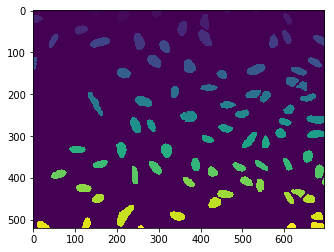

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_K12_s1_w193D6C057-1AA9-4E2F-86EA-2E71961BE68B.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_K12_s7_w12A7857A5-3C92-4A08-8E81-2CA8A99F67AE.png


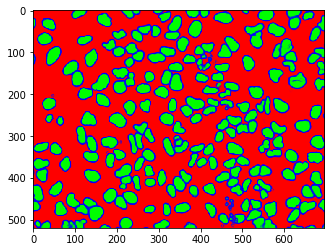

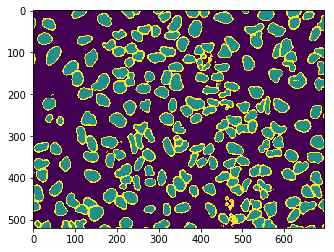

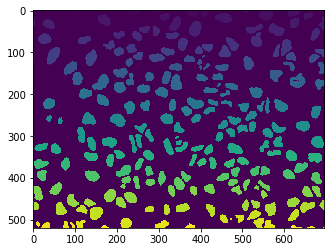

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_K12_s7_w12A7857A5-3C92-4A08-8E81-2CA8A99F67AE.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_L03_s2_w1AC4550E2-F824-4A58-9CC5-952AD9ECE76A.png


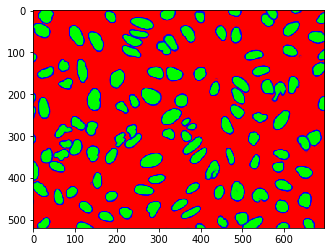

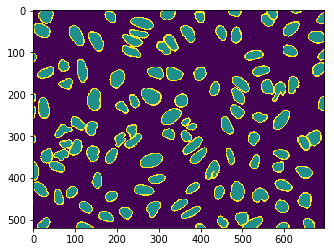

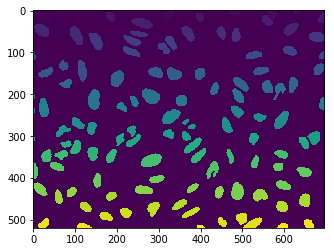

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_L03_s2_w1AC4550E2-F824-4A58-9CC5-952AD9ECE76A.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_L05_s2_w1B9C6FAC9-9D48-4184-8D9B-ABFC3BEC1125.png


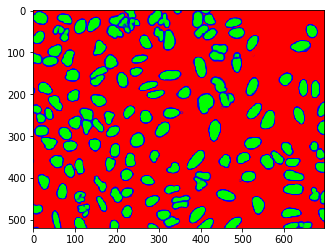

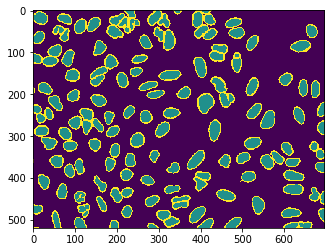

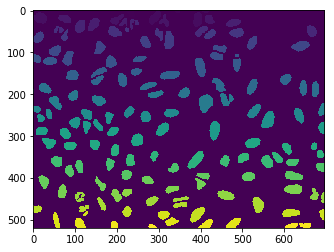

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_L05_s2_w1B9C6FAC9-9D48-4184-8D9B-ABFC3BEC1125.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_L11_s4_w13C057BB5-9CFB-471F-84B5-72F80654CF81.png


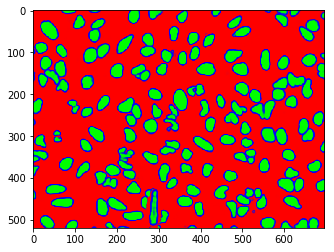

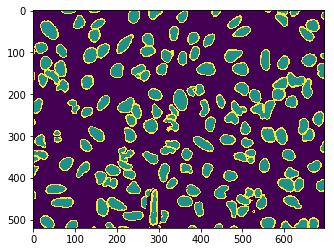

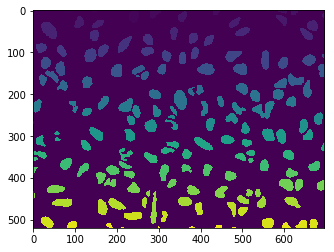

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_L11_s4_w13C057BB5-9CFB-471F-84B5-72F80654CF81.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_L14_s5_w14B42C89E-7650-44AC-9D7B-50BE61EA307E.png


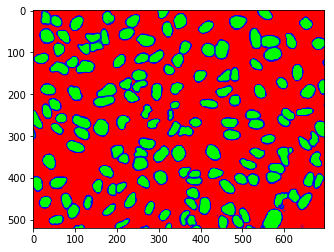

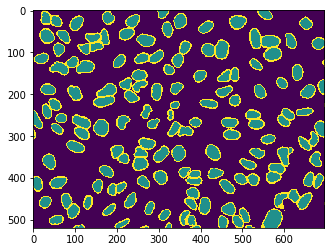

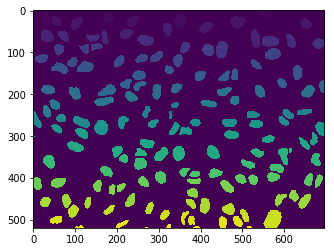

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_L14_s5_w14B42C89E-7650-44AC-9D7B-50BE61EA307E.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_M20_s3_w15C73A7C7-F81B-4583-AB8F-0A64336AF070.png


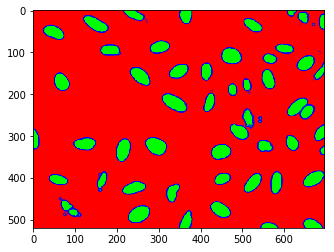

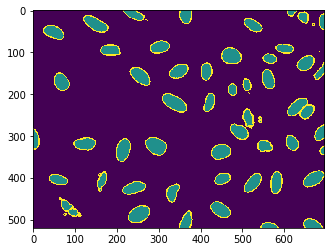

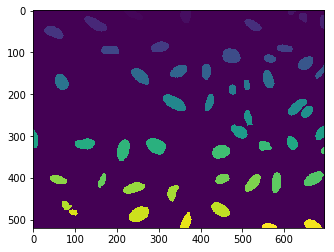

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_M20_s3_w15C73A7C7-F81B-4583-AB8F-0A64336AF070.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_M23_s8_w118BC311D-A998-4161-8256-22839B2421F2.png


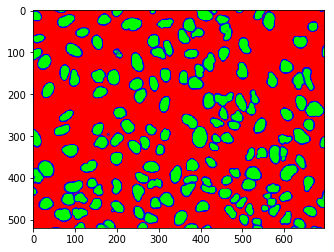

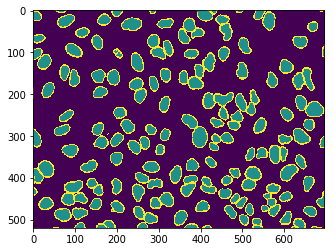

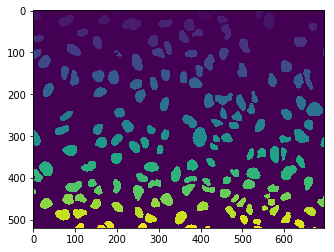

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_M23_s8_w118BC311D-A998-4161-8256-22839B2421F2.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_N12_s7_w166EF3FAB-EA33-4B28-91E3-034A1654BAAE.png


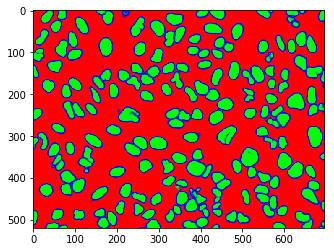

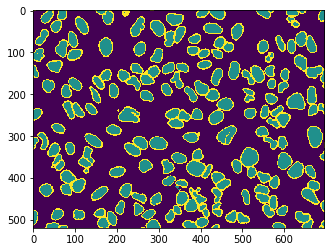

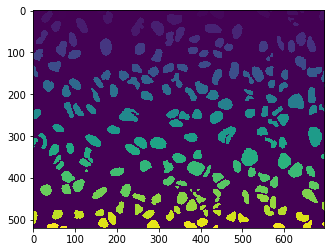

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_N12_s7_w166EF3FAB-EA33-4B28-91E3-034A1654BAAE.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_N18_s2_w1CC5ED51D-86C5-437D-8EDD-E56E4C949B3B.png


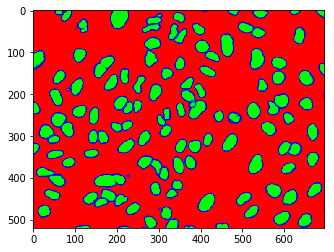

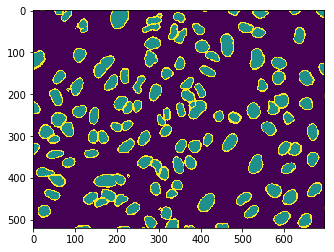

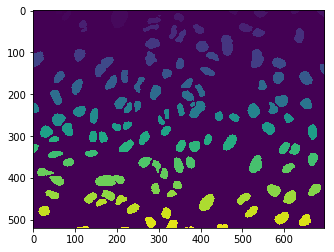

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_N18_s2_w1CC5ED51D-86C5-437D-8EDD-E56E4C949B3B.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_O09_s2_w133C7EDCE-1C7C-41A6-9E52-7AD499E7CDC8.png


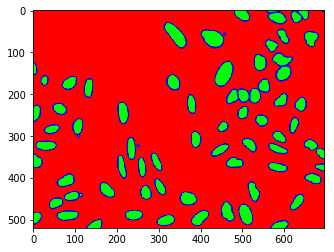

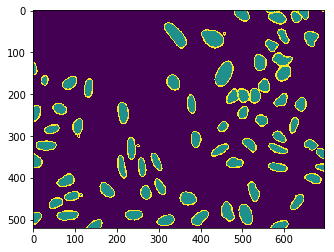

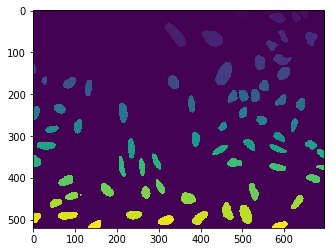

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_O09_s2_w133C7EDCE-1C7C-41A6-9E52-7AD499E7CDC8.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_O10_s8_w18F4DB020-BFB7-4F13-B99C-C39F8E54F85D.png


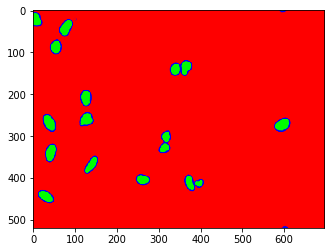

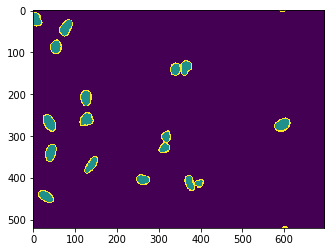

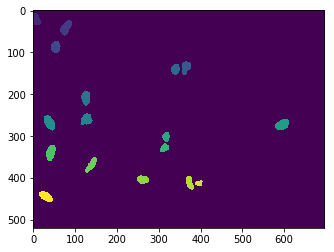

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_O10_s8_w18F4DB020-BFB7-4F13-B99C-C39F8E54F85D.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_O13_s3_w12D9C1C9C-C582-4080-B9BE-4807FA3E0843.png


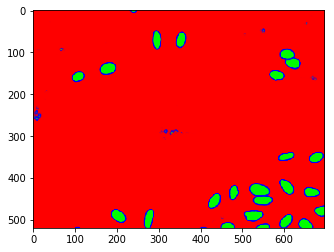

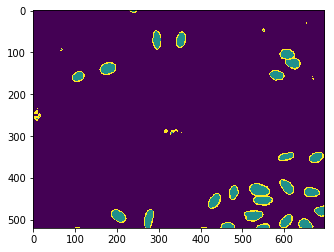

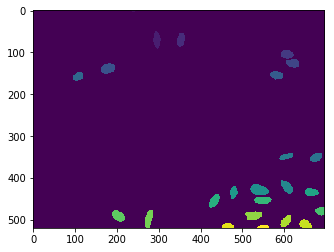

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_O13_s3_w12D9C1C9C-C582-4080-B9BE-4807FA3E0843.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_O16_s2_w1F6F6A3A1-99E4-4029-B734-022806CF6D42.png


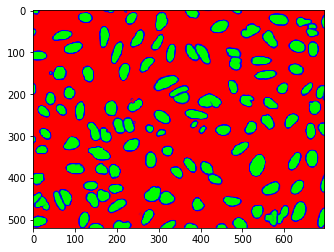

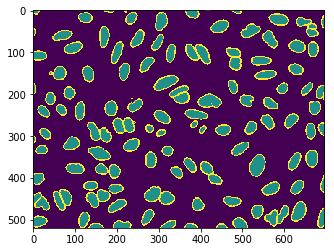

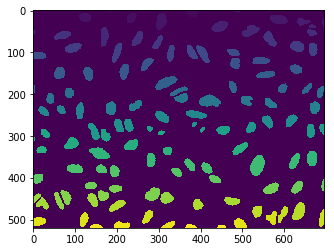

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_O16_s2_w1F6F6A3A1-99E4-4029-B734-022806CF6D42.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_P01_s3_w1A7DC2612-9C11-4656-B100-102AF8FE8B43.png


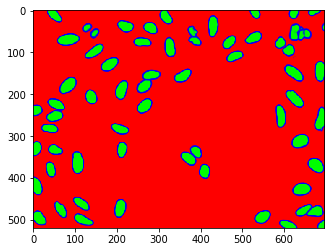

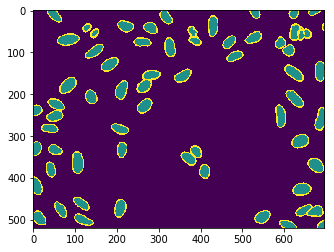

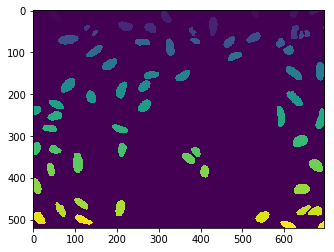

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_P01_s3_w1A7DC2612-9C11-4656-B100-102AF8FE8B43.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_P15_s3_w10F5E9699-743C-4177-93CE-27CFD65A925E.png


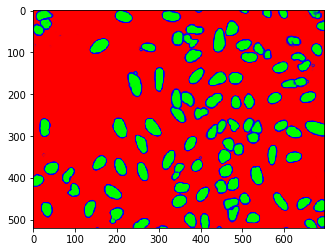

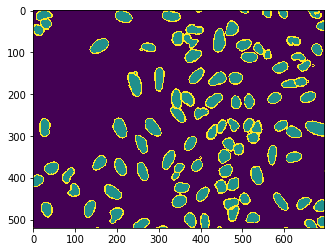

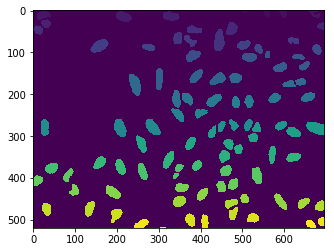

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_P15_s3_w10F5E9699-743C-4177-93CE-27CFD65A925E.png is a low contrast image
  warn('%s is a low contrast image' % fname)


IXMtest_P21_s5_w1ACEBEE91-BAFA-49E6-9D97-D07197400A15.png


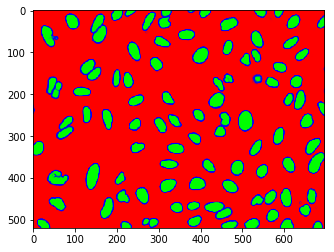

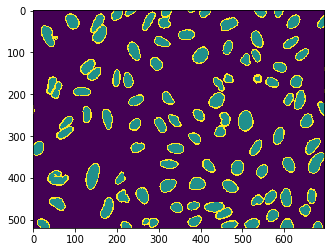

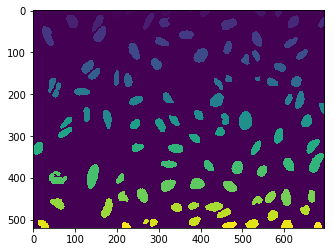

/home/lanbowen23/anaconda3/lib/python3.6/site-packages/skimage/io/_io.py:141: UserWarning: data1/image-segmentation/BBBC022/unet/experiments/01/out/segm/IXMtest_P21_s5_w1ACEBEE91-BAFA-49E6-9D97-D07197400A15.png is a low contrast image
  warn('%s is a low contrast image' % fname)


In [6]:
for i in range(len(images)):

    filename = imagebuffer.files[i]
    filename = os.path.basename(filename)
    print(filename)
    
    probmap = predictions[i].squeeze()
    
    plt.imshow(probmap)
    plt.show()
    
    skimage.io.imsave(config_vars["probmap_out_dir"] + filename, probmap)
    
    pred = utils.metrics.probmap_to_pred(probmap, config_vars["boundary_boost_factor"])

    plt.imshow(pred)
    plt.show()
    
    label = utils.metrics.pred_to_label(pred, config_vars["cell_min_size"])
    
    plt.imshow(label)
    plt.show()
    
    skimage.io.imsave(config_vars["labels_out_dir"] + filename, label)